In [3]:
import numpy as np                                                
import pandas as pd                                               
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()
from subprocess import check_output

In [4]:
titanic_data = pd.read_csv("titanic_train.csv")     

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [8]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [9]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [10]:
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

In [11]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

In [12]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [13]:
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [14]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [15]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [16]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


Text(0.5, 1.0, 'Pair Plot')

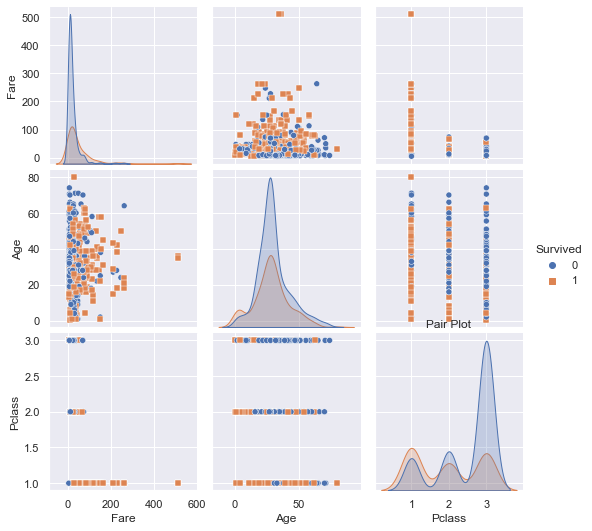

In [17]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Text(0.5, 1.0, 'Correlation between features')

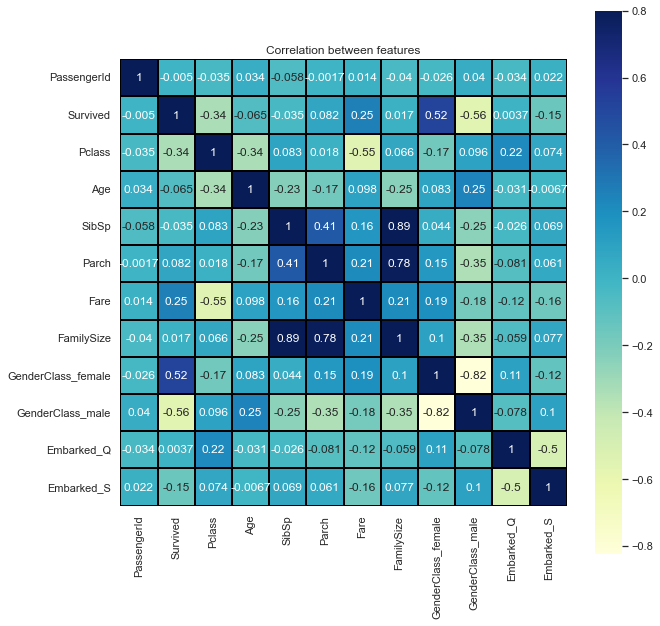

In [18]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [19]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [20]:
y = titanic.Survived 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
from sklearn import tree
print(tree.export_graphviz(model))

digraph Tree {
node [shape=box] ;
0 [label="X[6] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]"] ;
1 [label="X[1] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]"] ;
1 -> 2 ;
3 [label="X[3] <= 28.231\ngini = 0.18\nsamples = 60\nvalue = [6, 54]"] ;
2 -> 3 ;
4 [label="X[0] <= 48.0\ngini = 0.155\nsamples = 59\nvalue = [5, 54]"] ;
3 -> 4 ;
5 [label="X[0] <= 29.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
5 -> 7 ;
8 [label="X[0] <= 843.5\ngini = 0.133\nsamples = 56\nvalue = [4, 52]"] ;
4 -> 8 ;
9 [label="X[0] <= 373.0\ngini = 0.107\nsamples = 53\nvalue = [3, 50]"] ;
8 -> 9 ;
10 [label="X[0] <= 352.5\ngini = 0.204\nsamples = 26\nvalue = [3, 23]"] ;
9 -> 10 ;
11 [label="X[2] <= 27.0\ngini = 0.147\nsamples = 25\nva

[Text(141.980625, 211.04470588235293, 'X[6] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(54.269999999999996, 198.25411764705882, 'X[1] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]'),
 Text(29.52, 185.4635294117647, 'X[3] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]'),
 Text(21.599999999999998, 172.6729411764706, 'X[3] <= 28.231\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(18.72, 159.88235294117646, 'X[0] <= 48.0\ngini = 0.155\nsamples = 59\nvalue = [5, 54]'),
 Text(11.52, 147.09176470588235, 'X[0] <= 29.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(8.64, 134.30117647058825, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(14.399999999999999, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.919999999999998, 147.09176470588235, 'X[0] <= 843.5\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(20.16, 134.30117647058825, 'X[0] <= 373.0\ngini = 0.107\nsamples = 53\nvalue = [3, 50]'),
 Text(17.28, 121.510588

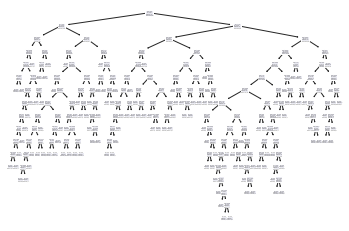

In [26]:
from sklearn import tree
tree.plot_tree(model)

In [27]:
y_pred_train = model.predict(X_train)  

In [28]:
y_pred_train = model.predict(X_train)  

In [29]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set

In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.776536312849162


In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  88                  18
Actual Survived              22                  51
